<a href="https://colab.research.google.com/github/Rohit-Singh1/Image-Processing-and-Deep-Learning/blob/main/SelectiveSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SELECTIVE SEARCH ALGORITHM

---

source : https://learnopencv.com/selective-search-for-object-detection-cpp-python/

In [1]:
import cv2
import requests
from google.colab import files

In [3]:
# downloading image from internet
url = f"https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.JJhXtHnhCYJgUjUz0tV1gAHaEi%26pid%3DApi&f=1https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.JJhXtHnhCYJgUjUz0tV1gAHaEi%26pid%3DApi&f=1"
img_data = requests.get(url).content
with open('dog.jpg', 'wb') as handler:
  handler.write(img_data)

files.download('dog.jpg')

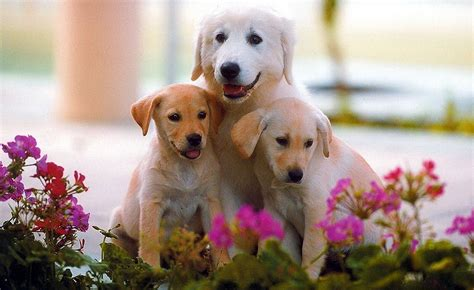

In [18]:
#cv2.imshow("./dog.jpg") ---> instead use this in google colab
from google.colab.patches import cv2_imshow
dog = cv2.imread("dog.jpg")
cv2_imshow(dog)


In [19]:
# Use threads to speed up background processes
cv2.setUseOptimized(True)
cv2.setNumThreads(8)
# Create Selective Search Segmentation object using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# set input image on which we will run segmentation
ss.setBaseImage(dog)
ss.switchToSelectiveSearchFast() # Quick search algorithm but low recall
#ss.switchToSelectiveSearchQuality()# High recall but algorithm is slow

In [24]:
rect = ss.process() # Return rectangles as tuple (x,y,width,height)

In [26]:
len(rect) #Total number of proposed regions

1299

In [36]:
# Forming rectangle
out = dog.copy()
for i,img in enumerate(rect):
  if i > 300 and i < 500:
    x,y,w,h = img
    cv2.rectangle(out,(x,y),(x+w,y+h),(0,255,0),1,cv2.LINE_AA)
  if i>500:
    break
  

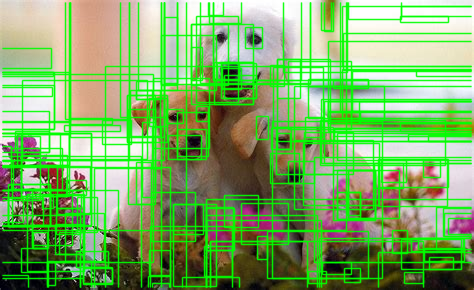

In [37]:
cv2_imshow(out)